In [1]:
import os 
import sys

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pylab as plt 

from scipy.io import loadmat, savemat

In [2]:
data_dir = '/home/sepehr/Desktop/test/Results/ROI'

/home/sepehr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/sepehr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


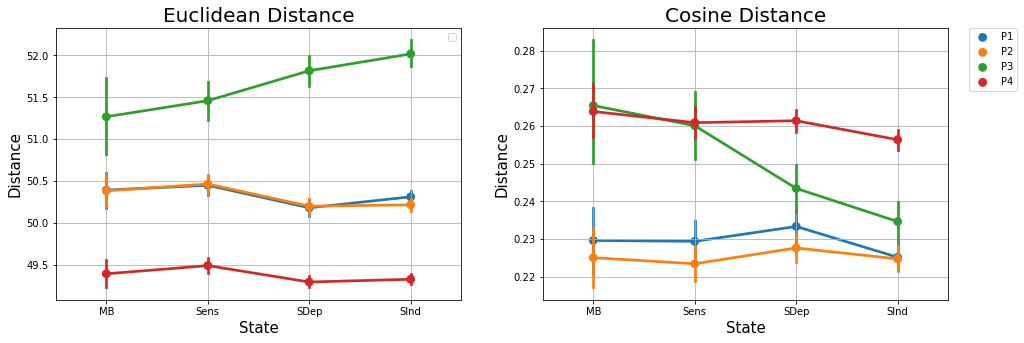

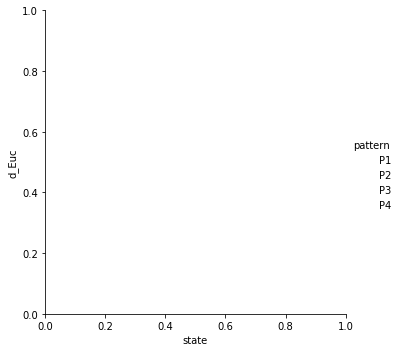

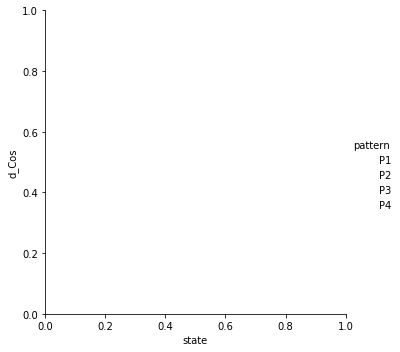

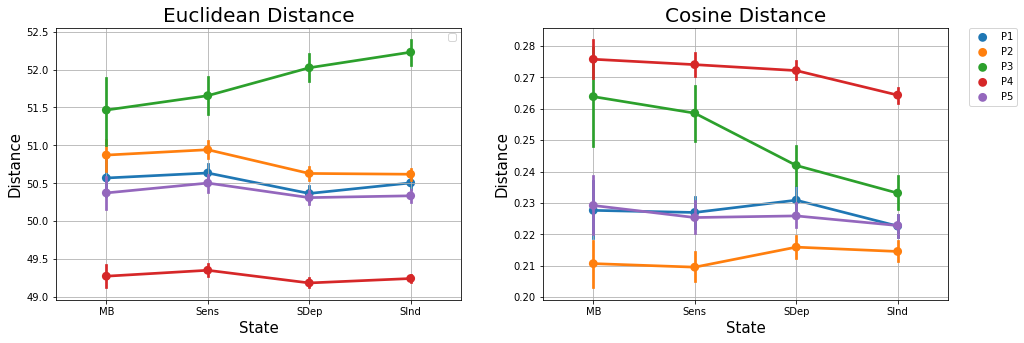

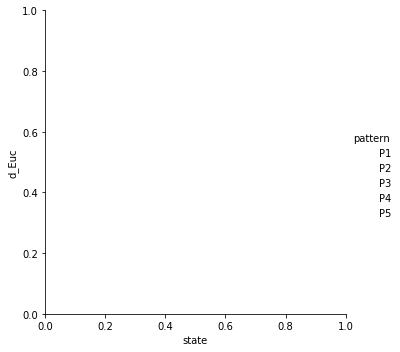

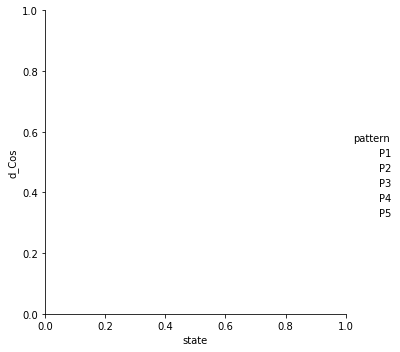

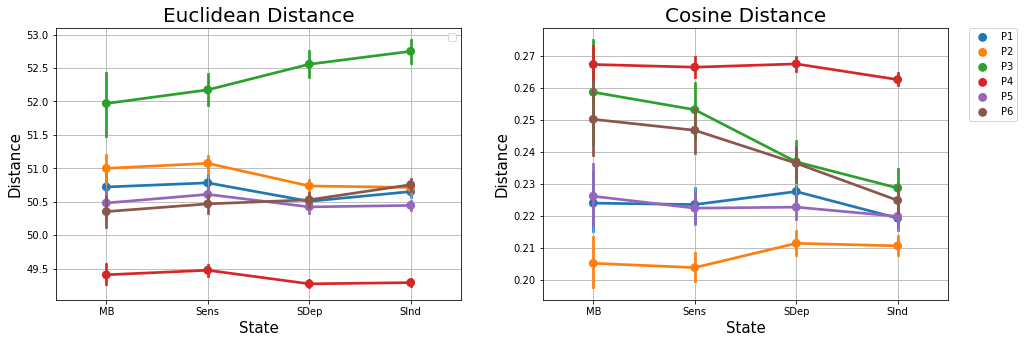

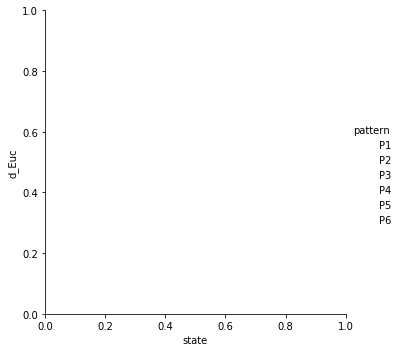

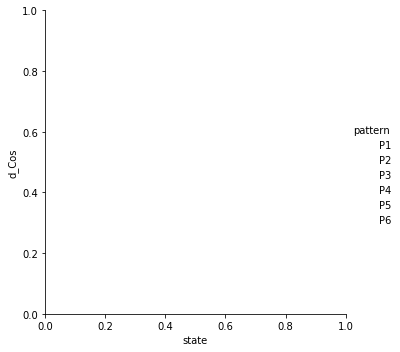

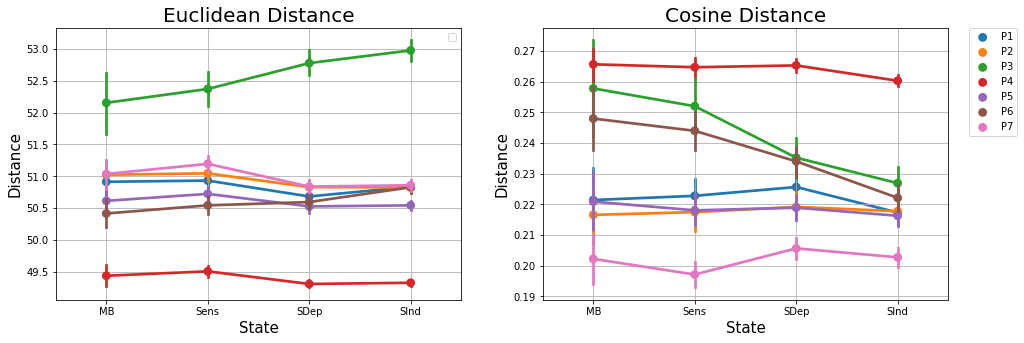

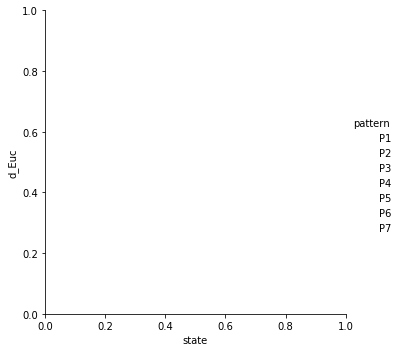

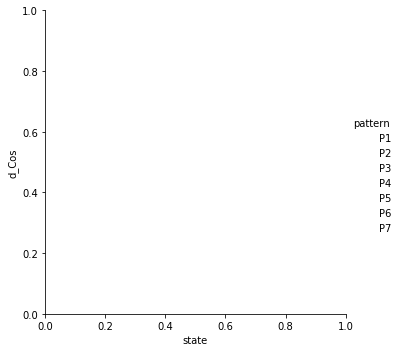

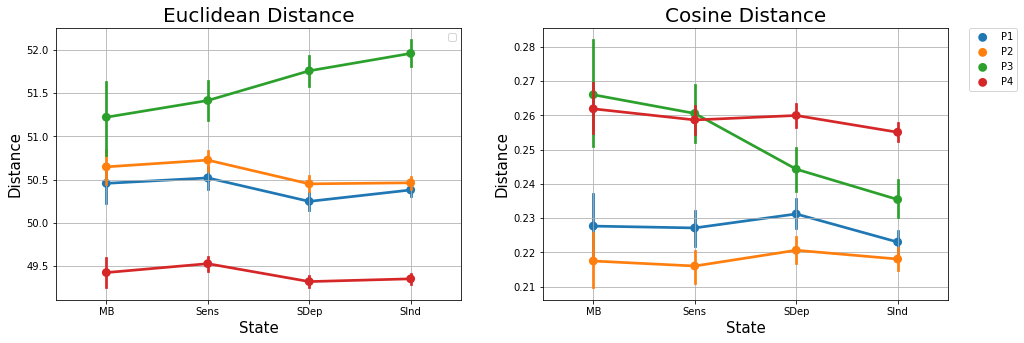

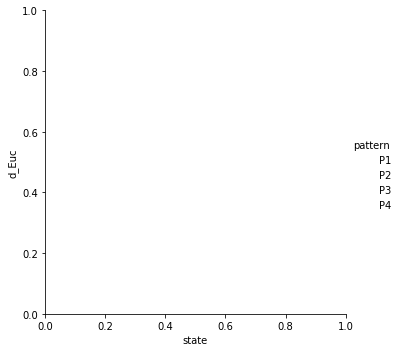

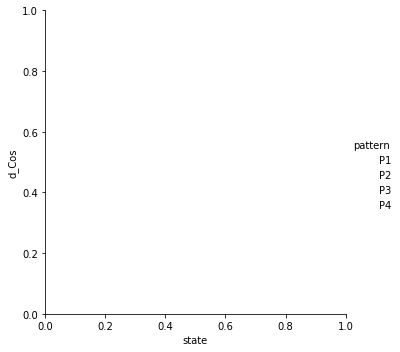

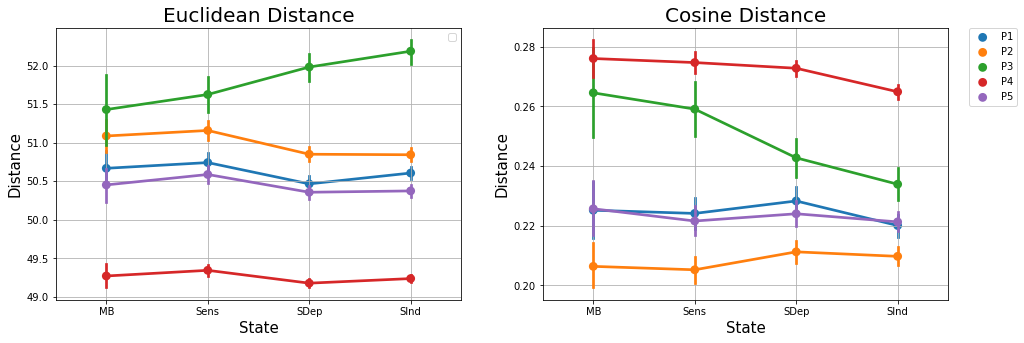

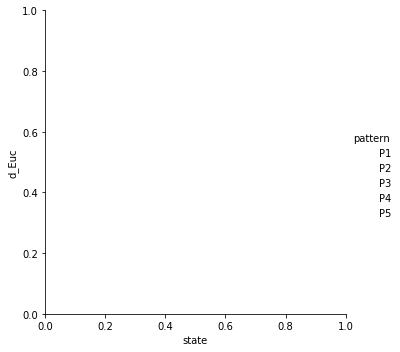

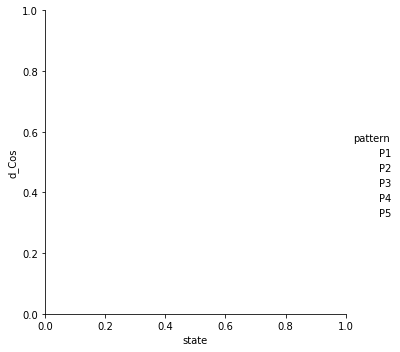

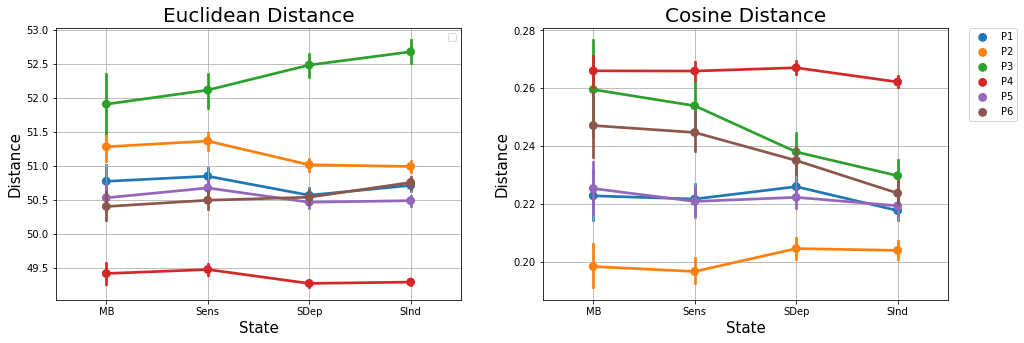

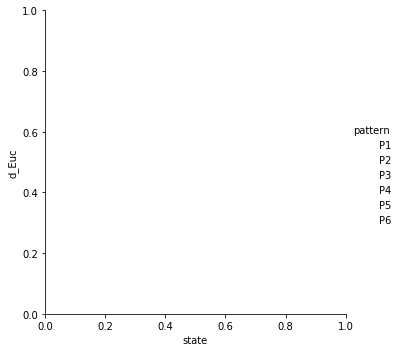

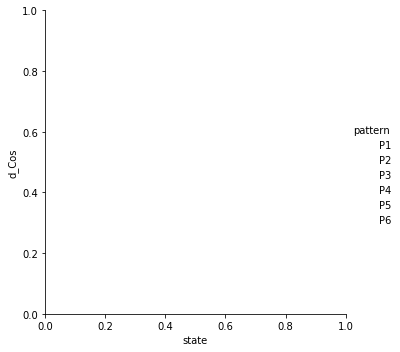

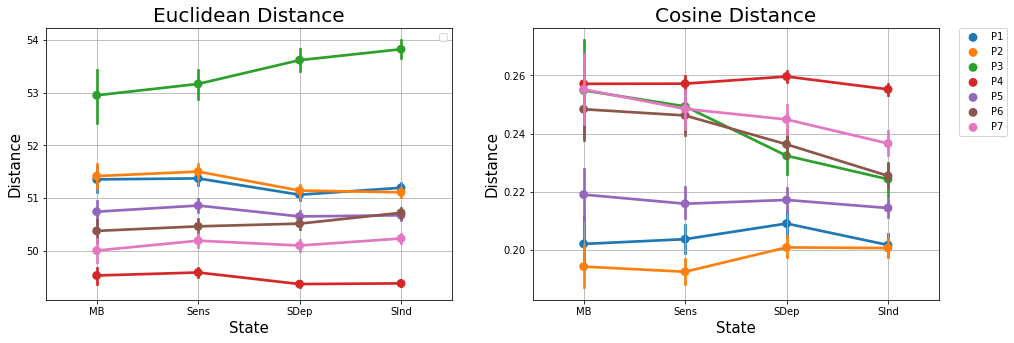

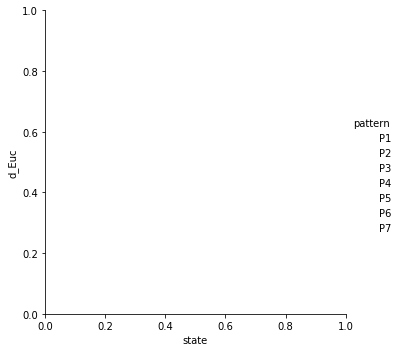

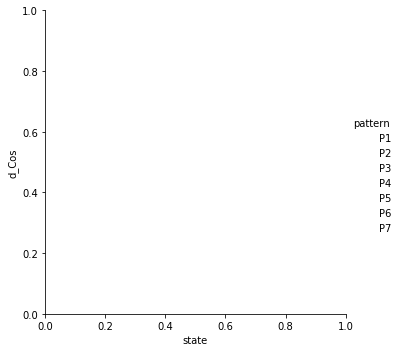

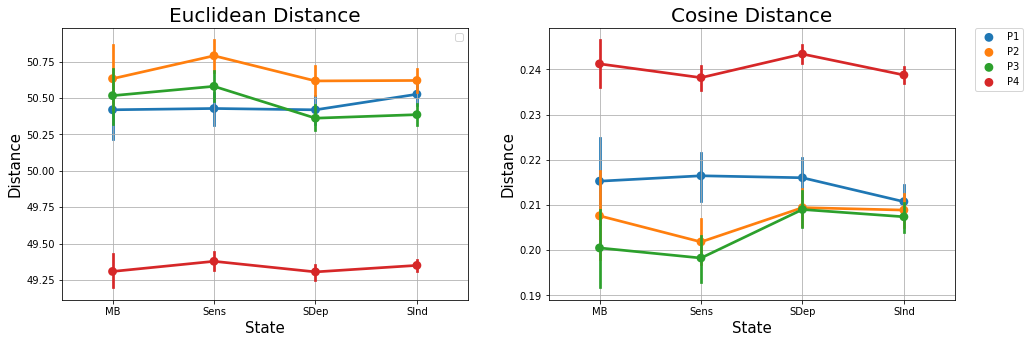

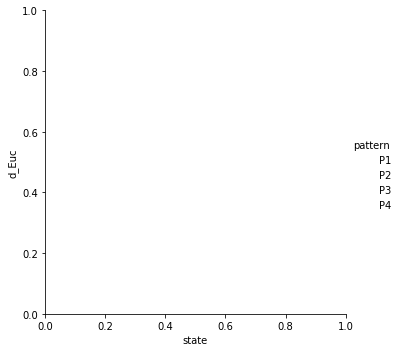

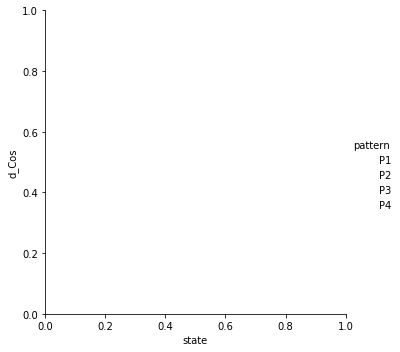

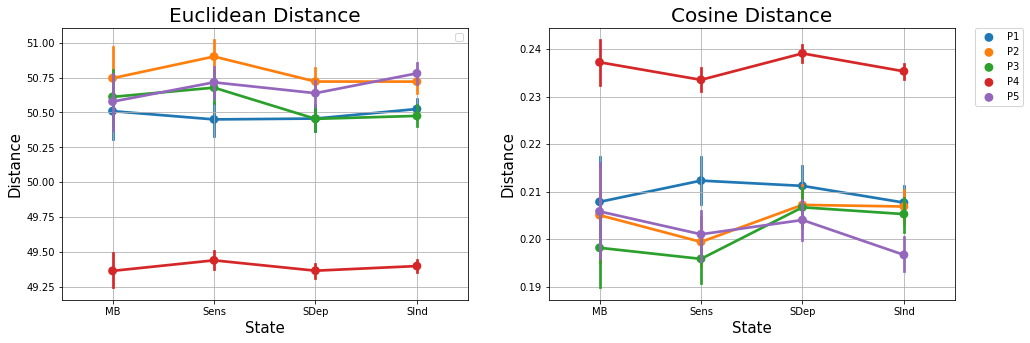

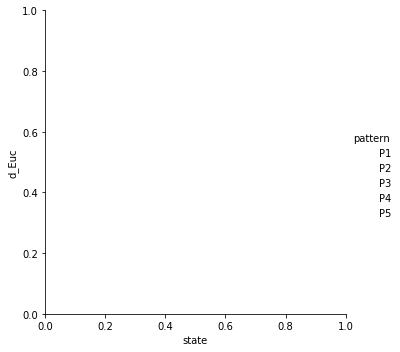

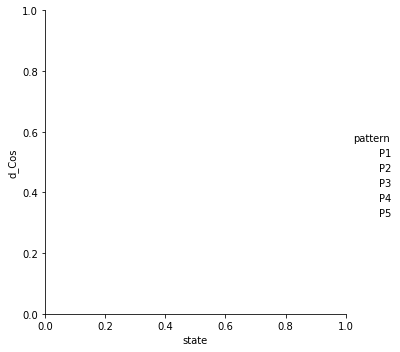

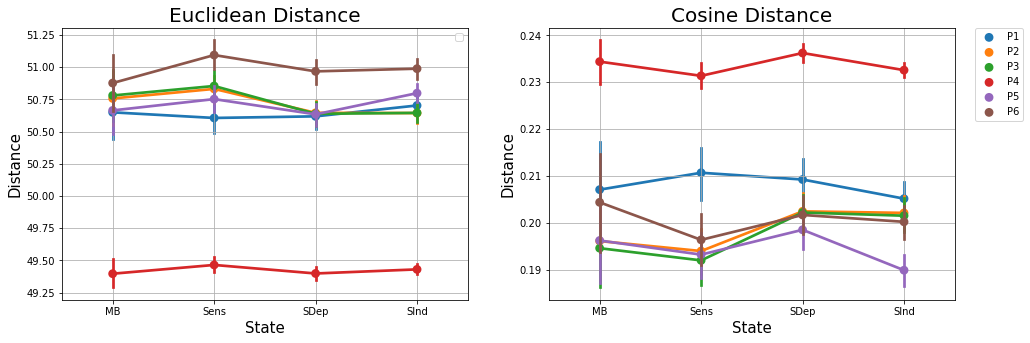

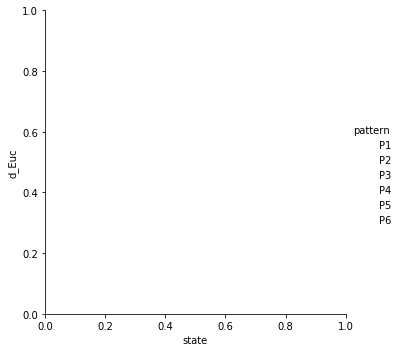

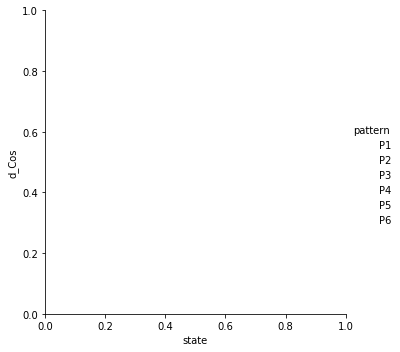

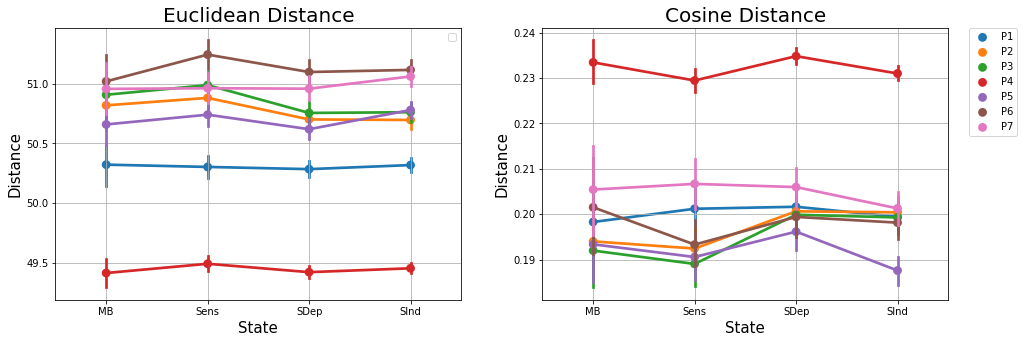

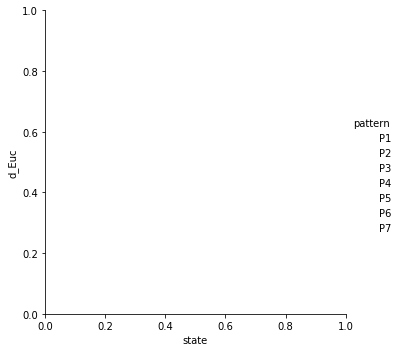

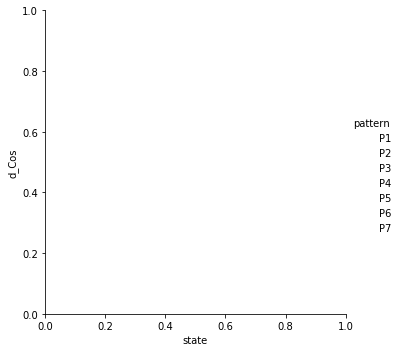

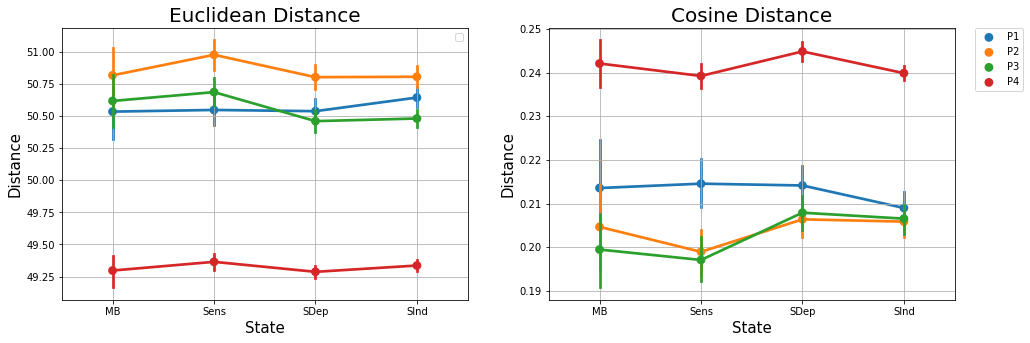

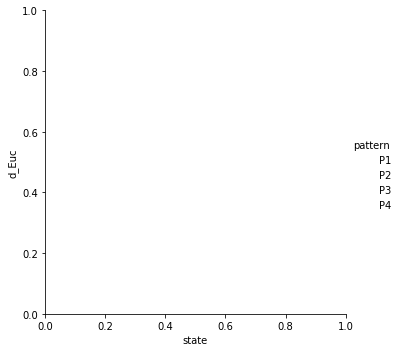

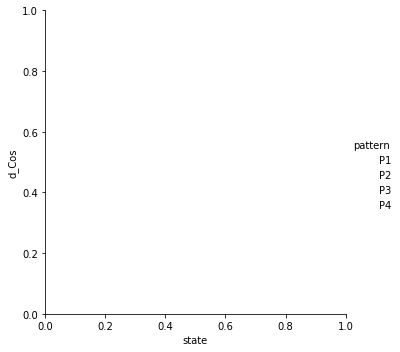

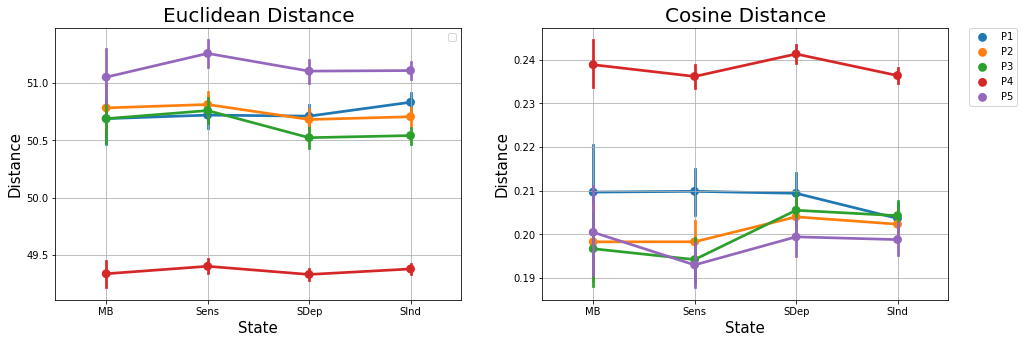

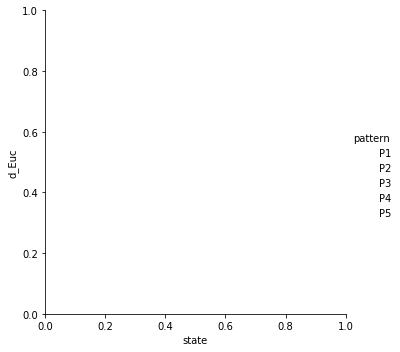

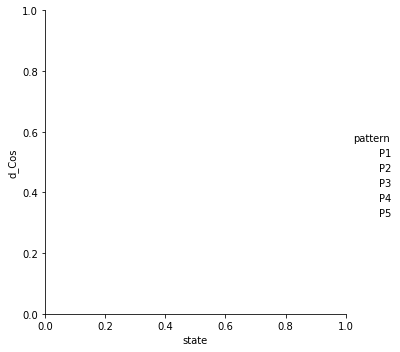

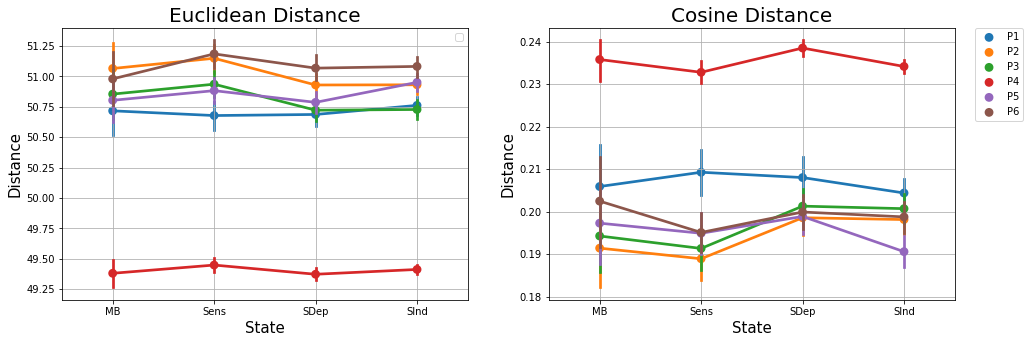

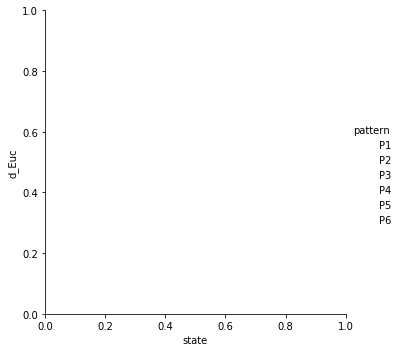

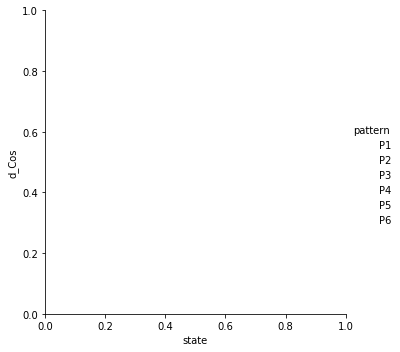

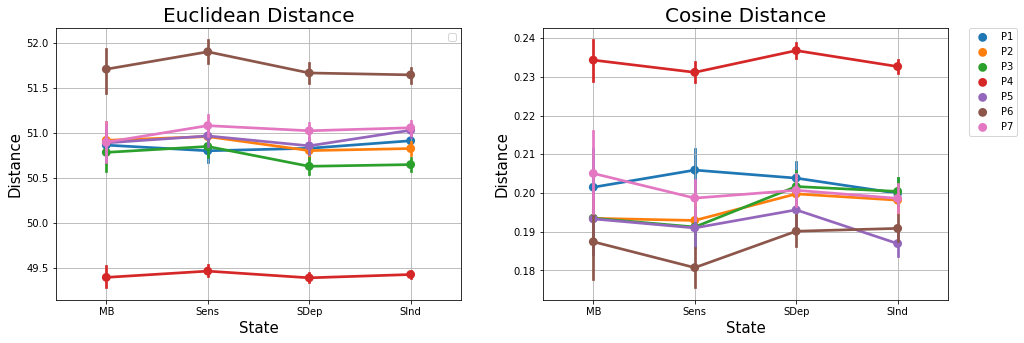

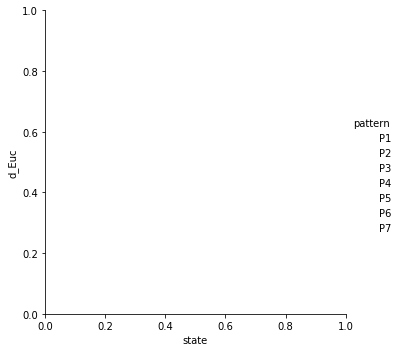

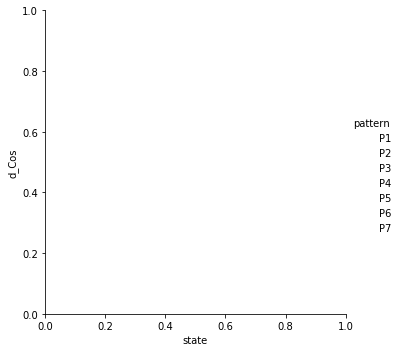

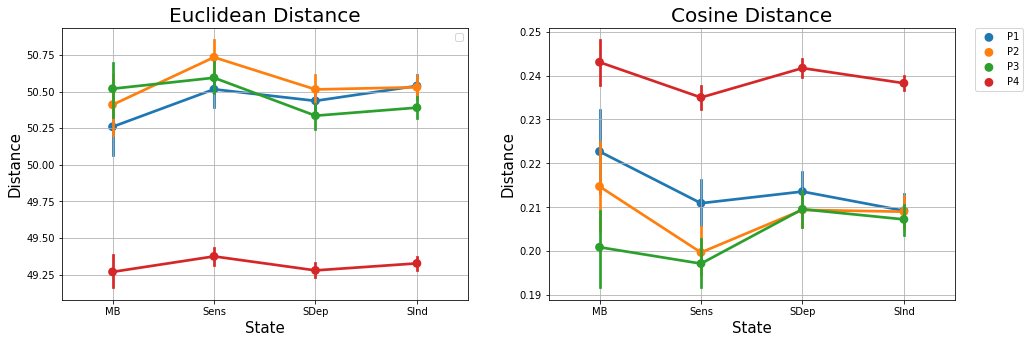

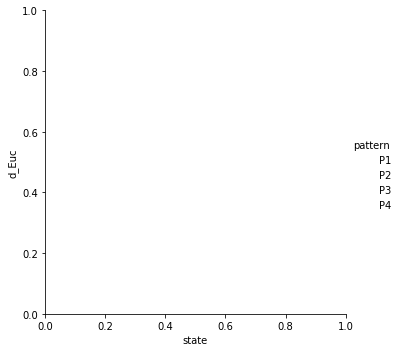

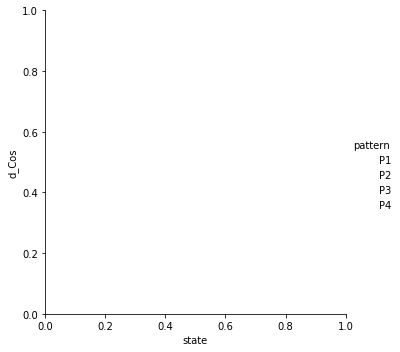

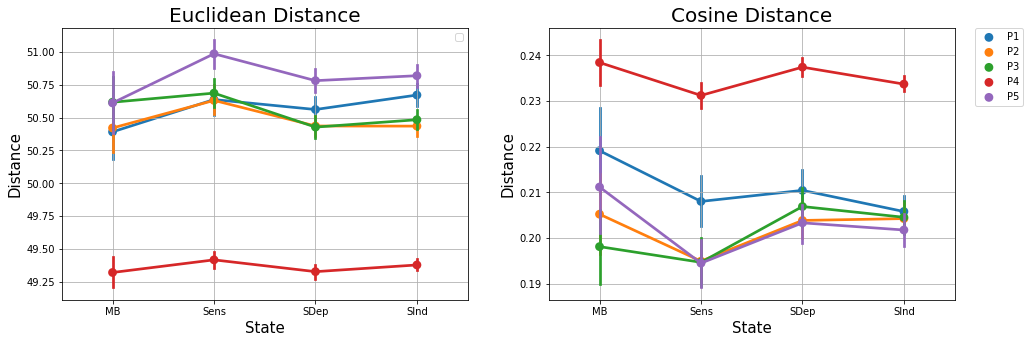

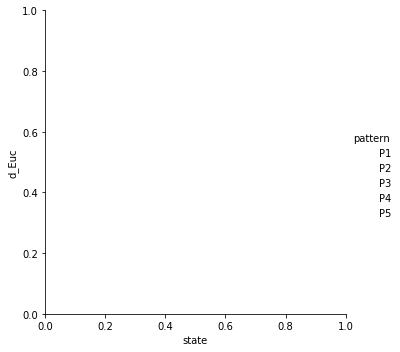

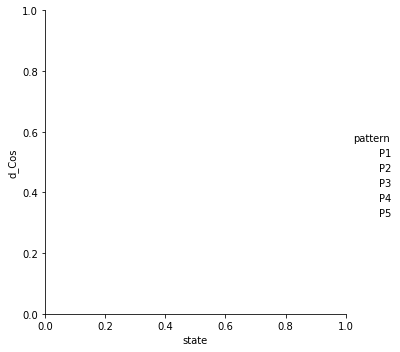

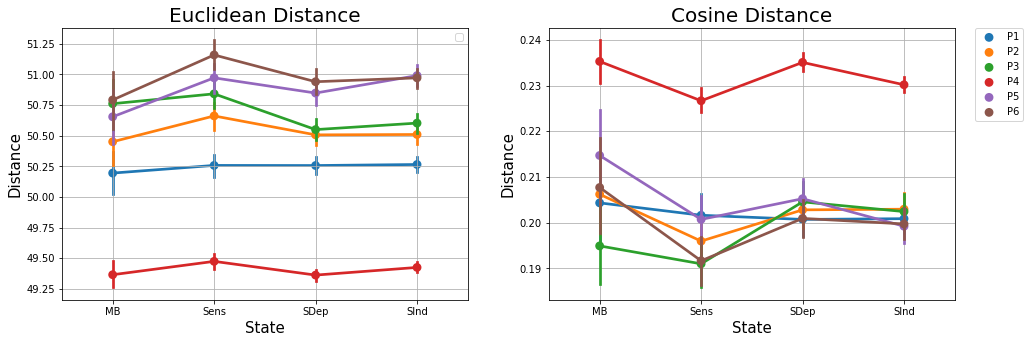

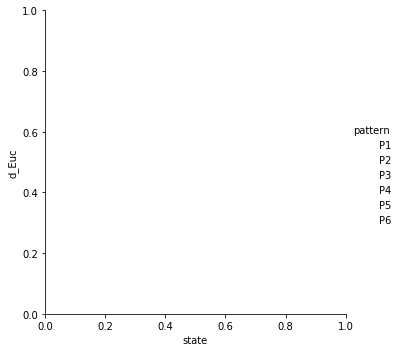

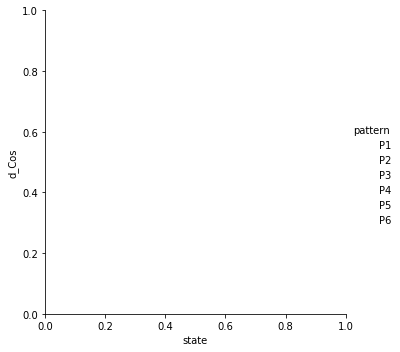

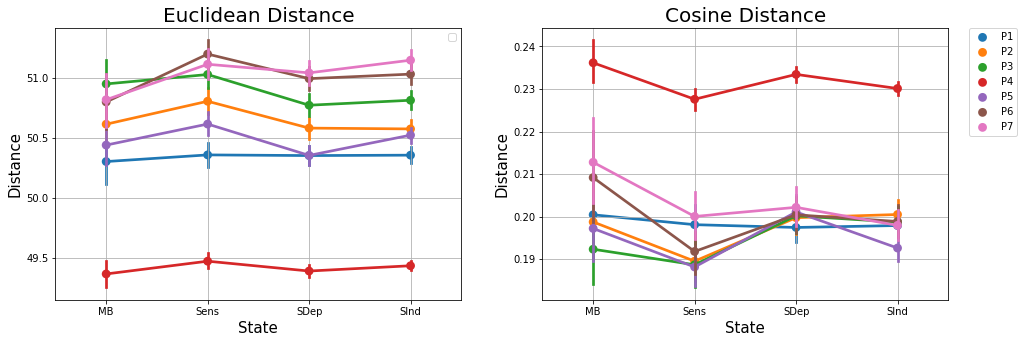

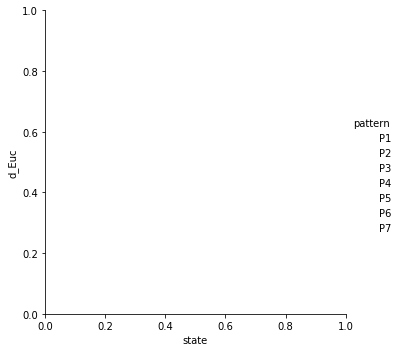

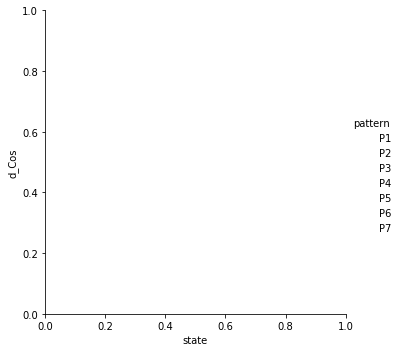

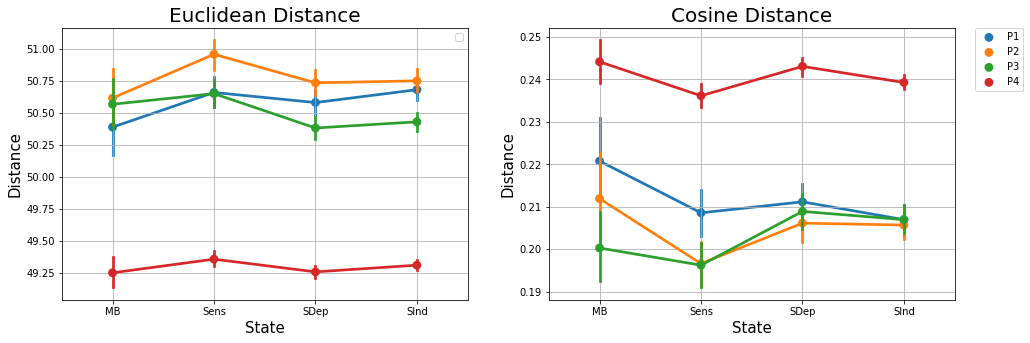

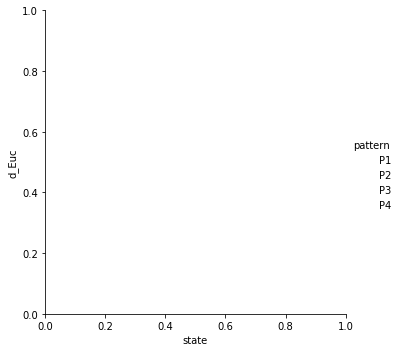

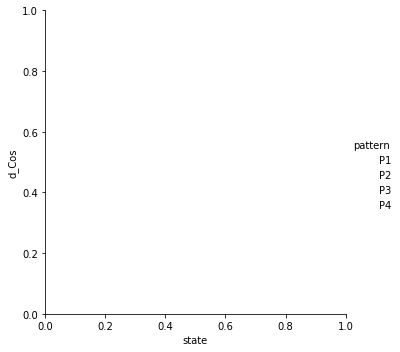

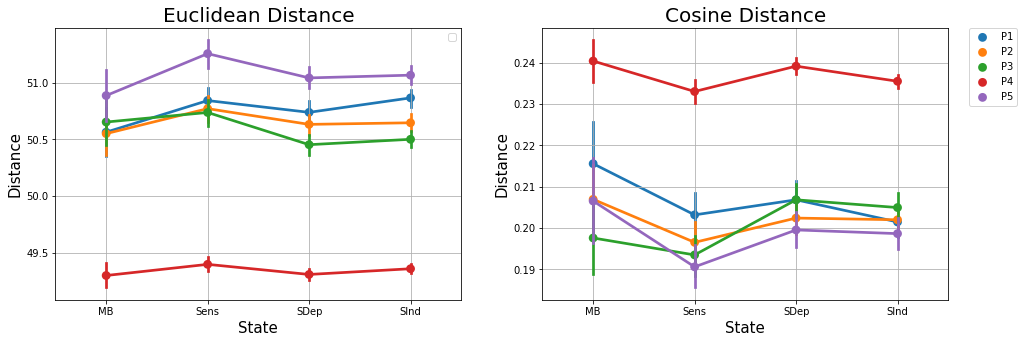

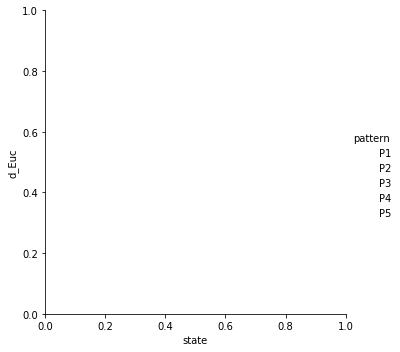

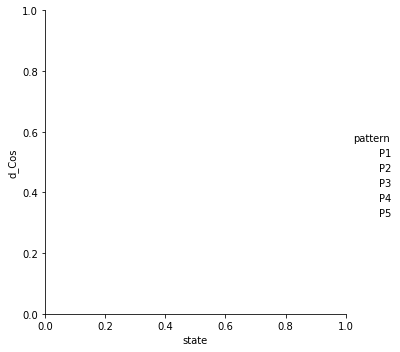

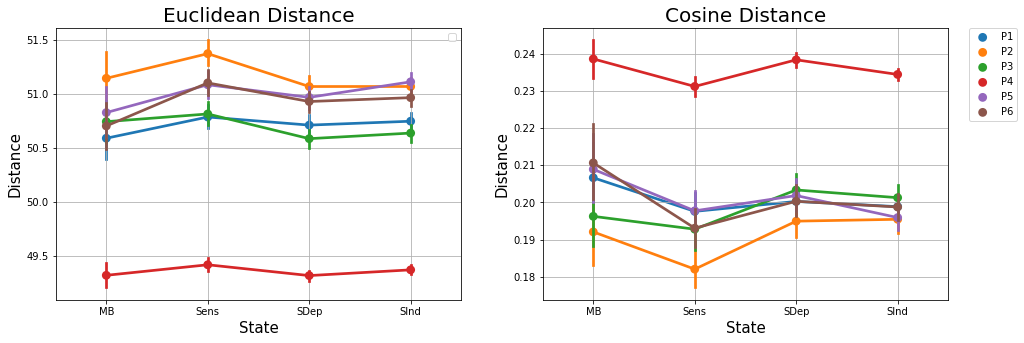

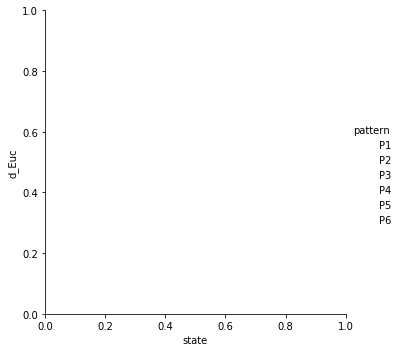

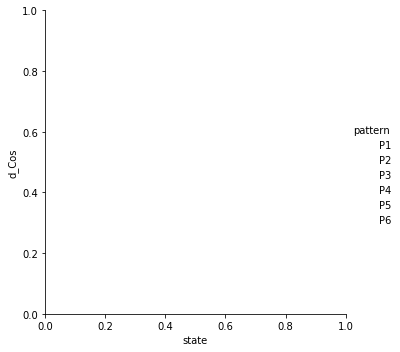

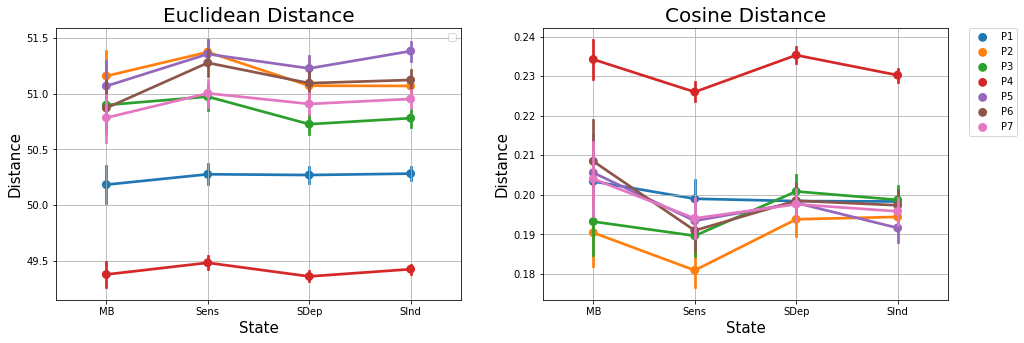

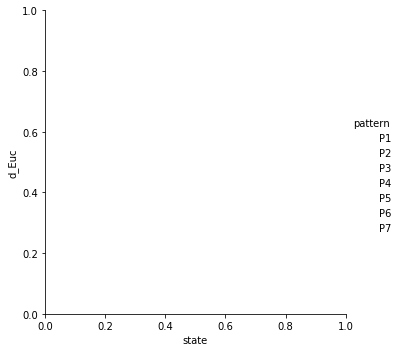

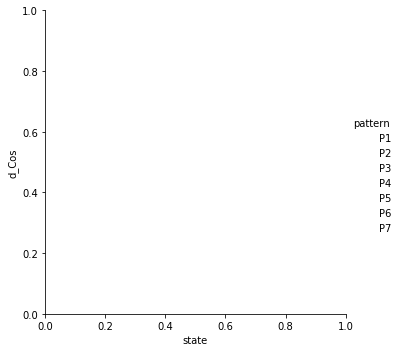

In [35]:
data_types = ['Normal', 'GSS', 'GSR']
Inc_frames = ['All', 'Rest']

for dtyp in data_types:
    for fr in Inc_frames:
        for pt in range(4,8):
            file_dir = os.path.join(data_dir, dtyp, 'Dist_'+dtyp+'_'+fr+'_'+str(pt)+'.csv')
            df = pd.read_csv(file_dir)
            f,a = plt.subplots(1,2, figsize=(16,5), gridspec_kw={'wspace':0.2})
            sns.catplot(x='state', y='d_Euc', data=df, 
                        hue='pattern', kind='point', 
                        order=['MB', 'Sens', 'SDep', 'SInd'], ax=a[0])
            sns.catplot(x='state', y='d_Cos', data=df, 
                        hue='pattern', kind='point', 
                        order=['MB', 'Sens', 'SDep', 'SInd'], ax=a[1])
            a[0].legend([])
            a[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            a[0].set_title('Euclidean Distance', size=20)
            a[1].set_title('Cosine Distance', size=20)
            a[0].set_ylabel('Distance', size=15)
            a[1].set_ylabel('Distance', size=15)
            a[0].set_xlabel('State', size=15)
            a[1].set_xlabel('State', size=15)
            a[0].grid(True)
            a[1].grid(True)
            f.savefig(file_dir.split('.')[0]+'.png', dpi=300)


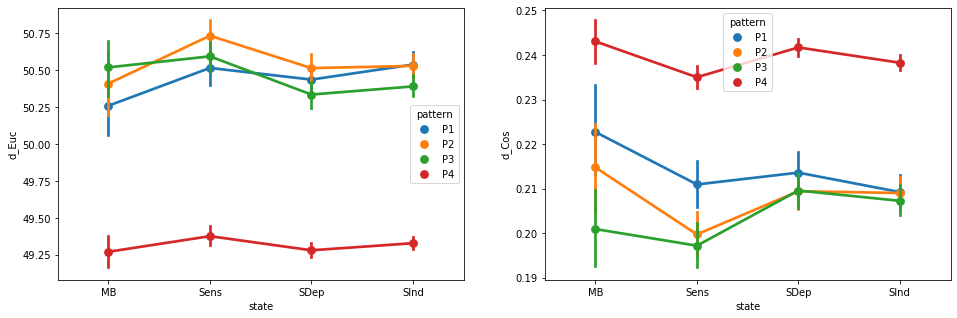

In [84]:
dtyp = 'GSR'
fr = 'All'
NC = 4

file_dir = os.path.join(data_dir, dtyp, 'Dist_'+dtyp+'_'+fr+'_'+str(NC)+'.csv')
df = pd.read_csv(file_dir)

f,a = plt.subplots(1,2, figsize=(16,5), gridspec_kw={'wspace':0.2})
sns.pointplot(x='state', y='d_Euc', data=df, 
            hue='pattern', 
            order=['MB', 'Sens', 'SDep', 'SInd'], ax=a[0])
sns.pointplot(x='state', y='d_Cos', data=df, 
            hue='pattern', 
            order=['MB', 'Sens', 'SDep', 'SInd'], ax=a[1])

In [86]:
df1 = df[df.pattern=='P1']
df1['d_Euc'] = (df1['d_Euc']-np.mean(df1['d_Euc']))/np.std(df1['d_Euc'])
df2 = df[df.pattern=='P2']
df2['d_Euc'] = (df2['d_Euc']-np.mean(df2['d_Euc']))/np.std(df2['d_Euc'])
df3 = df[df.pattern=='P3']
df3['d_Euc'] = (df3['d_Euc']-np.mean(df3['d_Euc']))/np.std(df3['d_Euc'])
df4 = df[df.pattern=='P4']
df4['d_Euc'] = (df4['d_Euc']-np.mean(df4['d_Euc']))/np.std(df4['d_Euc'])

df = pd.concat([df1,df2,df3,df4], ignore_index=True)
df

/home/sepehr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sepehr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/sepehr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Unnamed: 0,subject,state,pattern,d_Euc,d_Cos
0,1,s8177,SDep,P1,0.969507,0.106526
1,5,s8177,SDep,P1,1.029197,0.102712
2,9,s8177,SDep,P1,1.024541,0.095995
3,13,s8177,SDep,P1,1.216170,0.094896
4,17,s8177,SDep,P1,1.302175,0.097031
...,...,...,...,...,...,...
35435,35424,s8800,Sens,P4,-0.534823,0.315943
35436,35428,s8800,Sens,P4,-0.315692,0.311595
35437,35432,s8800,Sens,P4,0.115999,0.308625
35438,35436,s8800,Sens,P4,0.100880,0.296230


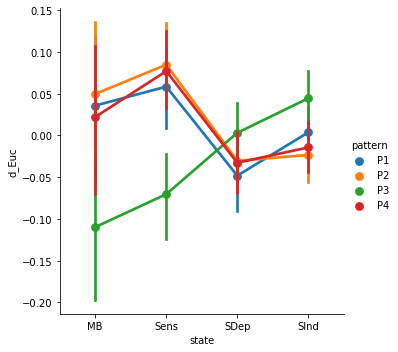

In [83]:
f,a = plt.subplots(figsize=(7,5))
sns.pointplot(x='state', y='d_Euc_norm', data=df, 
            hue='pattern', ax=a, 
            order=['MB', 'Sens', 'SDep', 'SInd'])
a.set_ylabel('Euclidean Distance (Z-Normalized)', size=15)
a.set_xlabel('State', size=15)
a.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
a.grid(True)
a.set_ylim([-0.25, 0.25])
a.set_title('N_Clusters = '+str(NC), size=20)
f.savefig(data_dir+'/'+dtyp+'/Dist_Norm_'+dtyp+'_'+fr+'_'+str(NC)+'.png', dpi=300))

## Pattern Assignments Frequency 

### k = 4

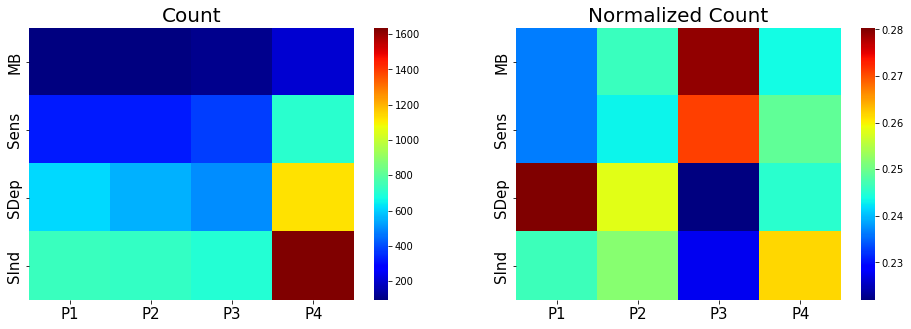

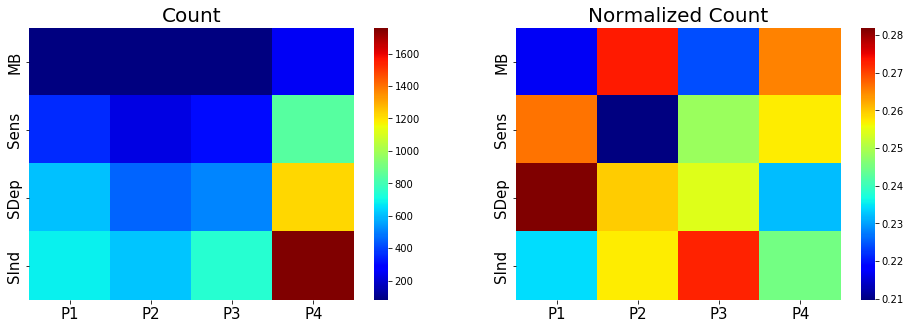

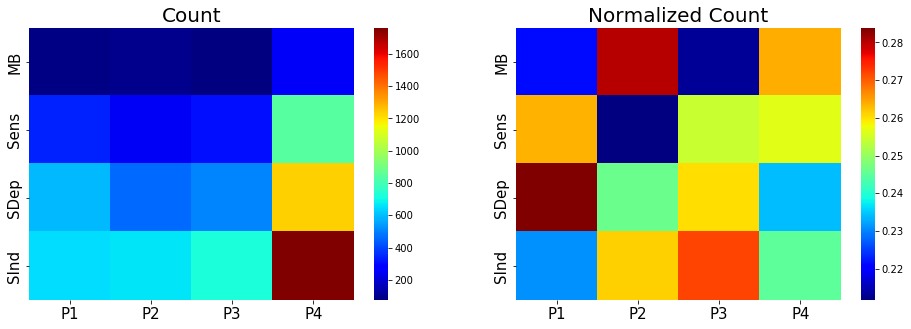

In [70]:
data_types = ['Normal', 'GSS', 'GSR']
Inc_frames = ['All']

for dtyp in data_types:
    for fr in Inc_frames:
        file_dir = os.path.join(data_dir, dtyp, 'Rest_Patterns_'+dtyp+'_'+fr+'.mat')
        data = loadmat(file_dir)
        reports = data['Report_Pointer']
        subs = data['Subject_Pointer']
        L = list(data.keys())
        pats = data[L[np.where([(L[i].startswith('pat') & L[i].endswith('4'))for i in range(len(L))])[0][0]]]
        idx = np.where(reports!=1)
        subs = subs[idx]
        pats = pats[idx]
        reports = reports[idx]
        df = pd.DataFrame({
            'subjects':subs, 
            'pattern':pats, 
            'state':reports, 
        })
        f,a = plt.subplots(1,2, figsize=(16,5))
        X = plt.histogram2d(reports, pats, bins=[4,4])[0]
        sns.heatmap(X, cmap='jet', ax=a[0])
        a[0].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[0].set_xticklabels(['P1', 'P2', 'P3', 'P4'], size=15)
        a[0].set_title('Count', size=20)
        for i in range(4):
            X[i,:] = X[i,:]/np.sum(X[i,:])
        for i in range(4):
            X[:,i] = X[:,i]/np.sum(X[:,i])
        
        sns.heatmap(X, cmap='jet', ax=a[1])
        a[1].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[1].set_xticklabels(['P1', 'P2', 'P3', 'P4'], size=15)
        a[1].set_title('Normalized Count', size=20)
        f.savefig(data_dir+'/'+dtyp+'/Count_fig_'+dtyp+'_'+fr+'_4.png', dpi=300)

### k = 5

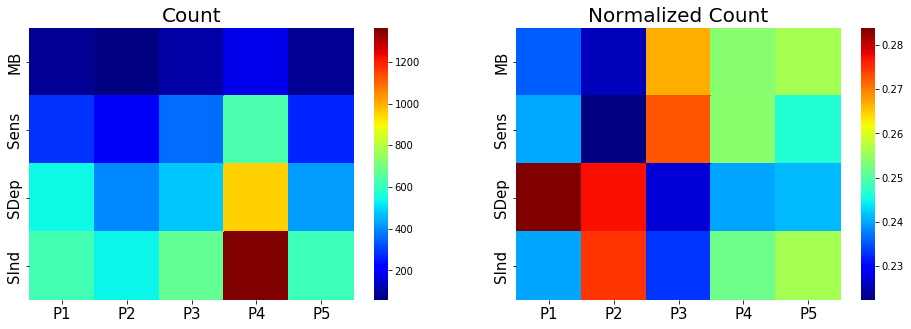

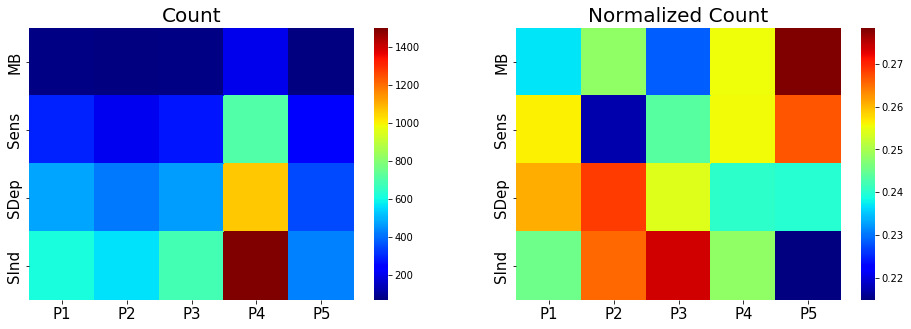

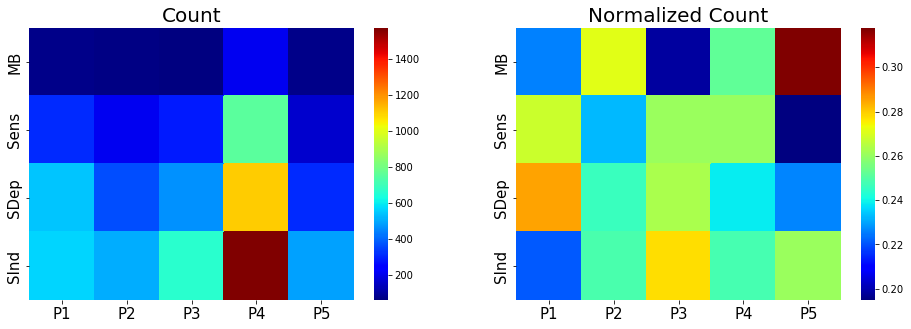

In [69]:
data_types = ['Normal', 'GSS', 'GSR']
Inc_frames = ['All']

for dtyp in data_types:
    for fr in Inc_frames:
        file_dir = os.path.join(data_dir, dtyp, 'Rest_Patterns_'+dtyp+'_'+fr+'.mat')
        data = loadmat(file_dir)
        reports = data['Report_Pointer']
        subs = data['Subject_Pointer']
        L = list(data.keys())
        pats = data[L[np.where([(L[i].startswith('pat') & L[i].endswith('5'))for i in range(len(L))])[0][0]]]
        idx = np.where(reports!=1)
        subs = subs[idx]
        pats = pats[idx]
        reports = reports[idx]
        df = pd.DataFrame({
            'subjects':subs, 
            'pattern':pats, 
            'state':reports, 
        })
        f,a = plt.subplots(1,2, figsize=(16,5))
        X = plt.histogram2d(reports, pats, bins=[4,5])[0]
        sns.heatmap(X, cmap='jet', ax=a[0])
        a[0].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[0].set_xticklabels(['P1', 'P2', 'P3', 'P4', 'P5'], size=15)
        a[0].set_title('Count', size=20)
        for i in range(4):
            X[i,:] = X[i,:]/np.sum(X[i,:])
        for i in range(5):
            X[:,i] = X[:,i]/np.sum(X[:,i])
        
        sns.heatmap(X, cmap='jet', ax=a[1])
        a[1].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[1].set_xticklabels(['P1', 'P2', 'P3', 'P4', 'P5'], size=15)
        a[1].set_title('Normalized Count', size=20)
        f.savefig(data_dir+'/'+dtyp+'/Count_fig_'+dtyp+'_'+fr+'_5.png', dpi=300)

### k = 6

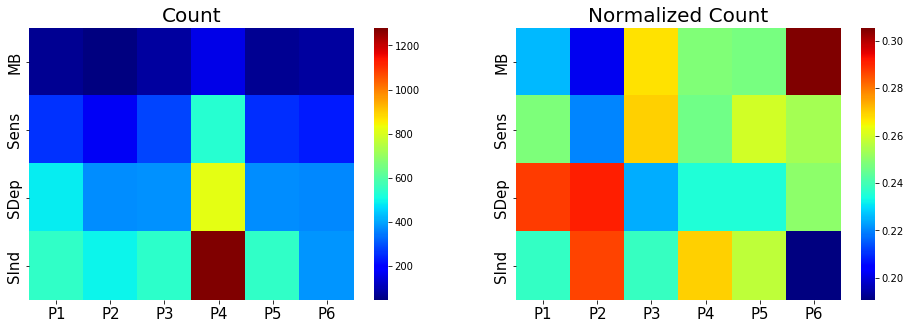

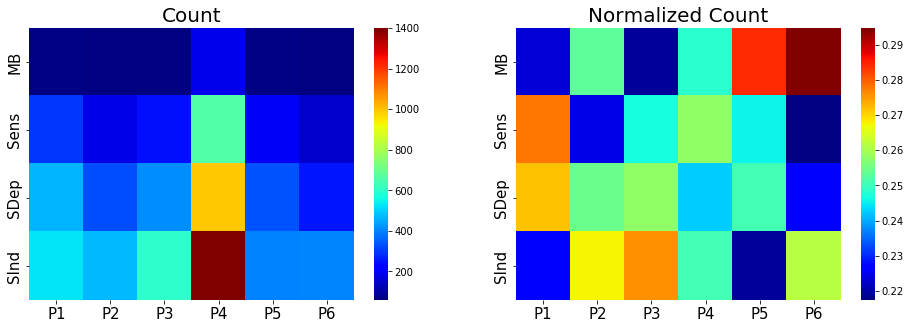

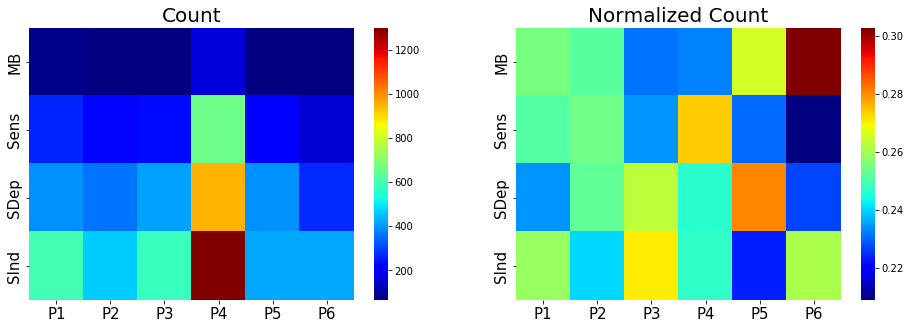

In [71]:
data_types = ['Normal', 'GSS', 'GSR']
Inc_frames = ['All']

for dtyp in data_types:
    for fr in Inc_frames:
        file_dir = os.path.join(data_dir, dtyp, 'Rest_Patterns_'+dtyp+'_'+fr+'.mat')
        data = loadmat(file_dir)
        reports = data['Report_Pointer']
        subs = data['Subject_Pointer']
        L = list(data.keys())
        pats = data[L[np.where([(L[i].startswith('pat') & L[i].endswith('6'))for i in range(len(L))])[0][0]]]
        idx = np.where(reports!=1)
        subs = subs[idx]
        pats = pats[idx]
        reports = reports[idx]
        df = pd.DataFrame({
            'subjects':subs, 
            'pattern':pats, 
            'state':reports, 
        })
        f,a = plt.subplots(1,2, figsize=(16,5))
        X = plt.histogram2d(reports, pats, bins=[4,6])[0]
        sns.heatmap(X, cmap='jet', ax=a[0])
        a[0].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[0].set_xticklabels(['P1', 'P2', 'P3', 'P4', 'P5', 'P6'], size=15)
        a[0].set_title('Count', size=20)
        for i in range(4):
            X[i,:] = X[i,:]/np.sum(X[i,:])
        for i in range(6):
            X[:,i] = X[:,i]/np.sum(X[:,i])
        
        sns.heatmap(X, cmap='jet', ax=a[1])
        a[1].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[1].set_xticklabels(['P1', 'P2', 'P3', 'P4', 'P5', 'P6'], size=15)
        a[1].set_title('Normalized Count', size=20)
        f.savefig(data_dir+'/'+dtyp+'/Count_fig_'+dtyp+'_'+fr+'_6.png', dpi=300)

### k = 7

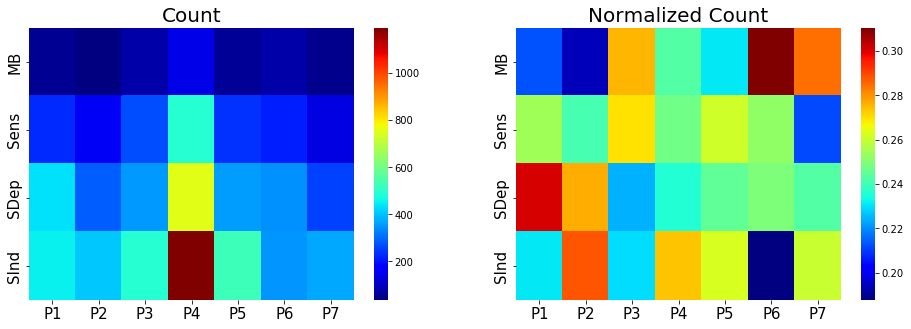

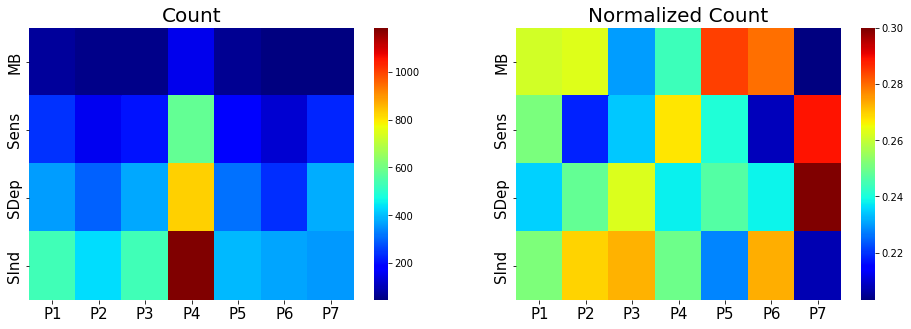

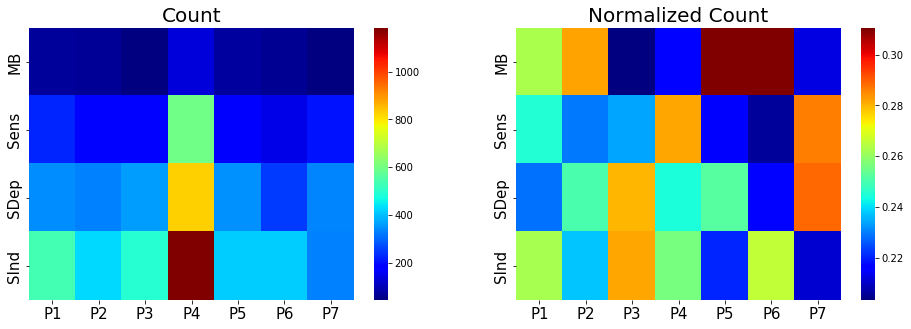

In [72]:
data_types = ['Normal', 'GSS', 'GSR']
Inc_frames = ['All']

for dtyp in data_types:
    for fr in Inc_frames:
        file_dir = os.path.join(data_dir, dtyp, 'Rest_Patterns_'+dtyp+'_'+fr+'.mat')
        data = loadmat(file_dir)
        reports = data['Report_Pointer']
        subs = data['Subject_Pointer']
        L = list(data.keys())
        pats = data[L[np.where([(L[i].startswith('pat') & L[i].endswith('7'))for i in range(len(L))])[0][0]]]
        idx = np.where(reports!=1)
        subs = subs[idx]
        pats = pats[idx]
        reports = reports[idx]
        df = pd.DataFrame({
            'subjects':subs, 
            'pattern':pats, 
            'state':reports, 
        })
        f,a = plt.subplots(1,2, figsize=(16,5))
        X = plt.histogram2d(reports, pats, bins=[4,7])[0]
        sns.heatmap(X, cmap='jet', ax=a[0])
        a[0].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[0].set_xticklabels(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'], size=15)
        a[0].set_title('Count', size=20)
        for i in range(4):
            X[i,:] = X[i,:]/np.sum(X[i,:])
        for i in range(7):
            X[:,i] = X[:,i]/np.sum(X[:,i])
        
        sns.heatmap(X, cmap='jet', ax=a[1])
        a[1].set_yticklabels(['MB', 'Sens', 'SDep', 'SInd'], size=15)
        a[1].set_xticklabels(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'], size=15)
        a[1].set_title('Normalized Count', size=20)
        f.savefig(data_dir+'/'+dtyp+'/Count_fig_'+dtyp+'_'+fr+'_7.png', dpi=300)